<a href="https://colab.research.google.com/github/ahmed92148/amaher_Machine_learning/blob/master/film_Poster_Classfication_26_oct_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

from keras.preprocessing import image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tqdm import tqdm

%matplotlib inline

Using TensorFlow backend.


In [7]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
cd drive/My\ Drive

/content/drive/My Drive


In [9]:
train = pd.read_csv('train.csv', error_bad_lines=False)    # reading the csv file
#data = pd.read_csv('file1.csv', error_bad_lines=False)

train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

The genre column contains the list for each image which specifies the genre of that movie. So, from the head of the .csv file, the genre of the first image is Comedy and Drama.
The remaining 25 columns are the one-hot encoded columns. So, if a movie belongs to the Action genre, its value will be 1, otherwise 0. The image can belong to 25 different genres.
We will build a model that will return the genre of a given movie poster. But before that, do you remember the first step for building any image classification model?
That’s right – loading and preprocessing the data. So, let’s read in all the training images:

In [11]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 2189/2189 [15:37<00:00,  2.59it/s]


In [12]:
X.shape

(2189, 400, 400, 3)

There are 7254 poster images and all the images have been converted to a shape of (400, 300, 3). Let’s plot and visualize one of the images:

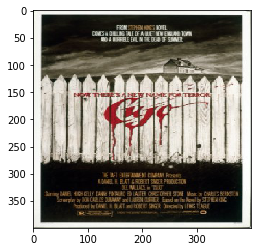

In [49]:
plt.imshow(X[30])

In [14]:

train['Genre'][300]

"['Comedy', 'Horror', 'Sci-Fi']"

In [50]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))

y.shape

(2189, 25)

The shape of the output array is (2189, 25) as we expected. Now, let’s create a validation set which will help us check the performance of our model on unseen data. We will randomly separate 10% of the images as our validation set:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [17]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)




Train on 1970 samples, validate on 219 samples
Epoch 1/10





1970/1970 [==============================] - 29s 15ms/step - loss: 0.5228 - acc: 0.7573 - val_loss: 0.4748 - val_acc: 0.9026
Epoch 2/10
1970/1970 [==============================] - 15s 8ms/step - loss: 0.3663 - acc: 0.8655 - val_loss: 0.3060 - val_acc: 0.9026
Epoch 3/10
1970/1970 [==============================] - 15s 8ms/step - loss: 0.3100 - acc: 0.8916 - val_loss: 0.2699 - val_acc: 0.9098
Epoch 4/10
1970/1970 [==============================] - 15s 8ms/step - loss: 0.2886 - acc: 0.8987 - val_loss: 0.2666 - val_acc: 0.9026
Epoch 5/10
1970/1970 [==============================] - 15s 8ms/step - loss: 0.2785 - acc: 0.9000 - val_loss: 0.2633 - val_acc: 0.9026
Epoch 6/10
1970/1970 [==============================] - 15s 8ms/step - loss: 0.2689 - acc: 0.9017 - val_loss: 0.2552 - val_acc: 0.9098
Epoch 7/10
1970/1970 [==============================] - 16s 8ms/step - loss: 0.2659 - acc: 0.9025 - val_loss: 0.2487 - val_acc: 0.9098

In [0]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))

img = image.img_to_array(img)

img = img/255

Drama (0.511)
Comedy (0.448)
Action (0.262)


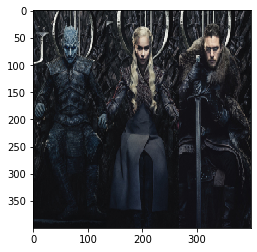

In [48]:
classes = np.array(train.columns[2:])

proba = model.predict(img.reshape(1,400,400,3))

top_3 = np.argsort(proba[0])[:-4:-1]

for i in range(3):

    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))

plt.imshow(img)

In [0]:
img = image.load_img('U2.jpg',target_size=(400,400,3))

img = image.img_to_array(img)

img = img/255

Drama (0.512)
Comedy (0.446)
Action (0.257)


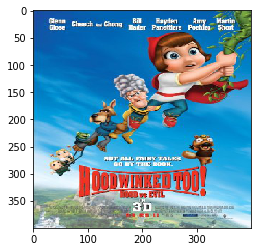

In [54]:
classes = np.array(train.columns[2:])

proba = model.predict(img.reshape(1,400,400,3))

top_3 = np.argsort(proba[0])[:-4:-1]

for i in range(3):

    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))

plt.imshow(img)

In [0]:
img = image.load_img('golmal.jpg',target_size=(400,400,3))

img = image.img_to_array(img)

img = img/255

Drama (0.511)
Comedy (0.446)
Action (0.256)


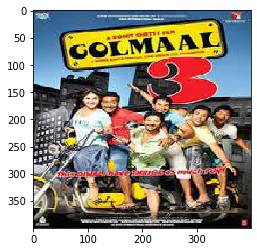

In [46]:
classes = np.array(train.columns[2:])

proba = model.predict(img.reshape(1,400,400,3))

top_3 = np.argsort(proba[0])[:-4:-1]

for i in range(3):

    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))

plt.imshow(img)

Golmaal 3 was a comedy and our model has predicted it as the topmost genre. The other predicted genres are Drama and Romance – a relatively accurate assessment. We can see that the model is able to predict the genres just by seeing their poster.

Next Steps and Experimenting on your own
This is how we can solve a multi-label image classification problem. Our model performed really well even though we only had around 7000 images for training it.
You can try and collect more posters for training. My suggestion would be to make the dataset in such a way that all the genre categories will have comparatively equal distribution. Why?
Well, if a certain genre is repeating in most of the training images, our model might overfit on that genre. And for every new image, the model might predict the same genre. To overcome this problem, you should try to have an equal distribution of genre categories.
These are some of the key points which you can try to improve the performance of your model. Any other you can think of? Let me know!

End Notes
There are multiple applications of multi-label image classification apart from genre prediction. You can use this technique to automatically tag images, for example. Suppose you want to predict the type and color of a clothing item in an image. You can build a multi-label image classification model which will help you to predict both!
I hope this article helped you understand the concept of multi-label image classification. If you have any feedback or suggestions, feel free to share them in the comments section below. Happy experimenting!